在95.0%信度下，所需样本量: 97
样本中的次品率: 0.07
95%置信区间: (0.02, 0.12)
根据样本次品率判断，是否拒收批次: 接受


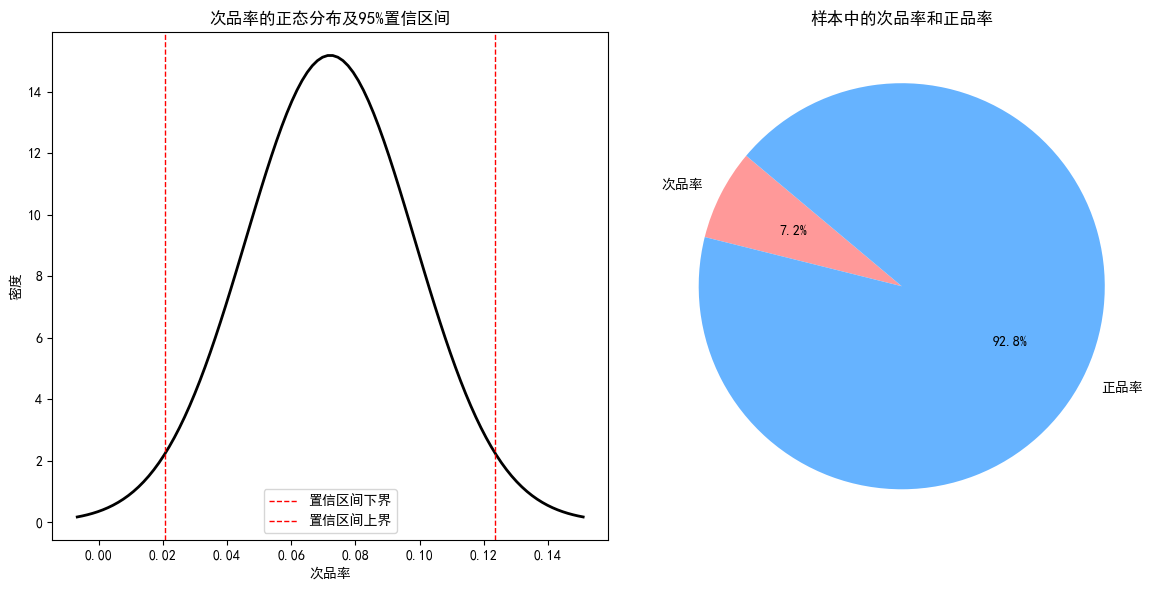

在95.0%信度下，误差为5.0%时的最小样本量: 139


In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置字体为SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 参数设置
p0 = 0.10  # 标称次品率
confidence_level = 0.95
error_margin = 0.06  # 误差范围

# 计算在给定置信度下的Z值
def get_z_value(confidence_level):
    return norm.ppf(1 - (1 - confidence_level) / 2)

z = get_z_value(confidence_level)

# 样本量计算函数
def calculate_sample_size(p0, error_margin, z):
    n = (z**2 * p0 * (1 - p0)) / (error_margin**2)
    return np.ceil(n).astype(int)

# 计算所需样本量
sample_size = calculate_sample_size(p0, error_margin, z)
print(f"在{confidence_level*100}%信度下，所需样本量: {sample_size}")

# 生成正品和次品样本数据
def generate_sample_data(sample_size, p0):
    # 生成二项分布数据，1表示次品，0表示正品
    data = np.random.binomial(1, p0, sample_size)
    return data

# 生成数据
data = generate_sample_data(sample_size, p0)

# 计算样本中的次品率
sample_defective_rate = np.mean(data)
print(f"样本中的次品率: {sample_defective_rate:.2f}")

# 计算95%置信区间
def calculate_confidence_interval(sample_defective_rate, sample_size, confidence_level):
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / sample_size)
    margin_of_error = get_z_value(confidence_level) * std_dev
    lower_bound = sample_defective_rate - margin_of_error
    upper_bound = sample_defective_rate + margin_of_error
    return lower_bound, upper_bound

# 计算置信区间
lower_bound, upper_bound = calculate_confidence_interval(sample_defective_rate, sample_size, confidence_level)

print(f"95%置信区间: ({lower_bound:.2f}, {upper_bound:.2f})")

# 判断是否拒收批次：基于样本次品率直接判断
def accept_or_reject_batch(sample_defective_rate, p0):
    # 如果样本次品率小于等于标称次品率p0，则接受，否则拒收
    if sample_defective_rate <= p0:
        return "接受"
    else:
        return "拒收"

# 判断是否拒收
decision = accept_or_reject_batch(sample_defective_rate, p0)
print(f"根据样本次品率判断，是否拒收批次: {decision}")

# 绘制正态分布图和饼图
def plot_results(data, lower_bound, upper_bound, sample_defective_rate):
    plt.figure(figsize=(12, 6))
    
    # 正态分布图
    plt.subplot(1, 2, 1)
    mu = sample_defective_rate
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / len(data))
    x = np.linspace(mu - 3*std_dev, mu + 3*std_dev, 100)
    p = norm.pdf(x, mu, std_dev)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间下界')
    plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间上界')
    plt.title('次品率的正态分布及95%置信区间')
    plt.xlabel('次品率')
    plt.ylabel('密度')
    plt.legend()
    
    # 饼图
    plt.subplot(1, 2, 2)
    non_defective_rate = 1 - sample_defective_rate
    labels = ['次品率', '正品率']
    sizes = [sample_defective_rate, non_defective_rate]
    colors = ['#ff9999', '#66b3ff']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('样本中的次品率和正品率')
    
    plt.tight_layout()
    plt.show()

# 绘制结果图
plot_results(data, lower_bound, upper_bound, sample_defective_rate)

# 动态调整误差范围
new_error_margin = 0.05  # 假设将误差范围调整为5%
new_sample_size = calculate_sample_size(p0, new_error_margin, z)
print(f"在{confidence_level*100}%信度下，误差为{new_error_margin*100}%时的最小样本量: {new_sample_size}")